## 基本的な Shepp-Logan ファントムの k空間データ生成とフルサンプリングの再構成 を実装します。

１．Shepp-Logan ファントムの生成

２．2D フーリエ変換を用いた k空間データの取得

３．k空間データの可視化（振幅と位相の表示）

４．逆フーリエ変換によるフルサンプリング再構成

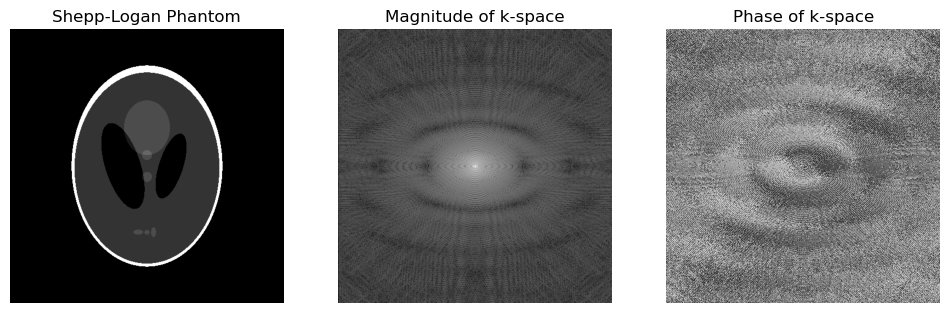

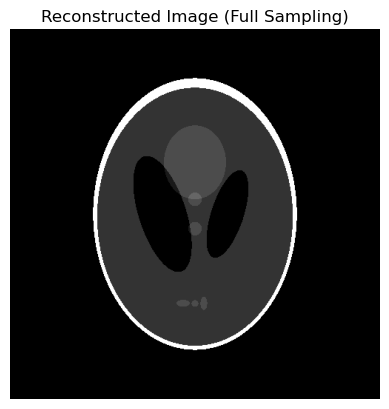

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# 1. Shepp-Logan ファントムの生成
# MRI 画像再構成のシミュレーションに使用されるテスト画像を作成
phantom = shepp_logan_phantom()
phantom = np.pad(phantom, ((50, 50), (50, 50)), mode='constant')  # パディングでサイズ調整

# 2. 2D Fourier Transform を用いた k空間データの取得
# 画像をフーリエ変換し、k空間データ（周波数領域）を得る
k_space = fftshift(fft2(phantom))

# 3. k空間データの可視化（振幅・位相）
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(phantom, cmap='gray')
plt.title("Shepp-Logan Phantom")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log1p(np.abs(k_space)), cmap='gray')  # 振幅スペクトル（対数スケール）
plt.title("Magnitude of k-space")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.angle(k_space), cmap='gray')  # 位相スペクトル
plt.title("Phase of k-space")
plt.axis('off')

plt.show()

# 4. 逆フーリエ変換によるフルサンプリング再構成
# k空間データを逆フーリエ変換し、元の画像を再構成する
reconstructed_image = np.abs(ifft2(ifftshift(k_space)))

plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (Full Sampling)")
plt.axis('off')
plt.show()


### アンダーサンプリング

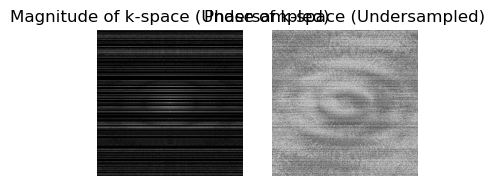

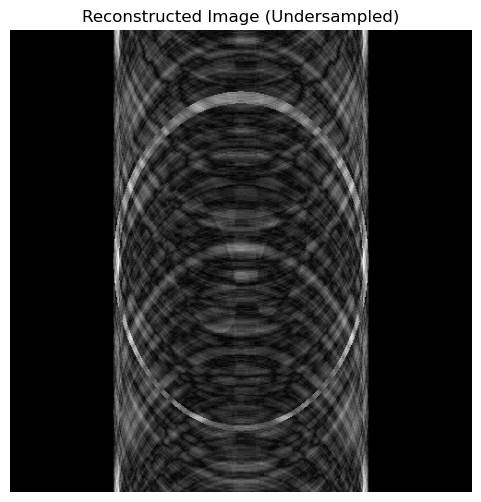

In [4]:
# 5. Cartesian サンプリング（1次元方向はフル、もう片方はランダム間引き）
nx, ny = k_space.shape
mask = np.zeros((nx, ny))
np.random.seed(42)  # 再現性のため乱数シード固定
sampling_rate = 0.3  # 30% のラインのみ取得
selected_lines = np.random.choice(nx, size=int(nx * sampling_rate), replace=False)
mask[selected_lines, :] = 1  # 選択したラインのみ取得
k_space_sampled = k_space * mask  # アンダーサンプリング適用

# 7. 逆フーリエ変換によるアンダーサンプリング再構成
# 欠損データの影響を可視化
reconstructed_image_undersampled = np.abs(ifft2(ifftshift(k_space_sampled)))


plt.subplot(1, 3, 2)
plt.imshow(np.log1p(np.abs(k_space_sampled)), cmap='gray')  # 振幅スペクトル（対数スケール）
plt.title("Magnitude of k-space (Undersampled)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.angle(k_space_sampled), cmap='gray')  # 位相スペクトル
plt.title("Phase of k-space (Undersampled)")
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_undersampled, cmap='gray')
plt.title("Reconstructed Image (Undersampled)")
plt.axis('off')
plt.show()